In [166]:
%matplotlib inline
import qiskit

In [167]:
qiskit.__version__

'2.0.0'

In [168]:
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService(channel="ibm_quantum", token="345f3799cf2d49d3ba79897d080444665e1d33e95ed935189528e530cdf25dc67060f7ee31c3af5d0b2aec7efa4f05c66fb0611663c57b1bcec36abf6e2f83b4")


In [169]:
backend = service.backend("ibm_brisbane")

In [170]:
backend.num_qubits

127

# 2-qubit Bell State

## Step 1: Map the problem to circuits and operators

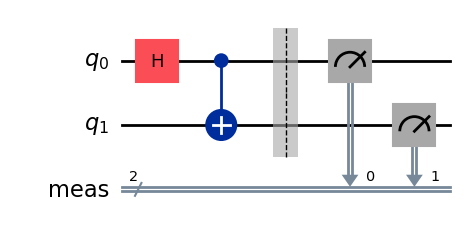

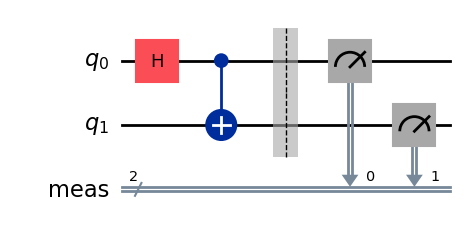

In [171]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(2)

qc.h(0)
qc.cx(0, 1)
qc.measure_all()

qc.draw(output='mpl')

## Step 2: Transpile the circuit

In [172]:
from qiskit import transpile

transpiled_qc = transpile(qc, backend)

## Step 3: Execute on the IBM machine

In [173]:
from qiskit_ibm_runtime import Sampler

sampler = Sampler(backend)
job = sampler.run([transpiled_qc])
result = job.result()

KeyboardInterrupt: 

transpiled_qc is a new version of the circuit, customized for that specific machine (IBM Brisbane), with:

    Allowed gates
    Correct wiring
    Optimized performance

## Step 4: Plot and interpret

In [165]:
meas = result[0].data.meas

# Convert raw array to proper binary strings
bitstrings = [
    format(shot, f"0{meas.num_bits}b")  # Format each shot as binary string
    for shot in meas.array.flatten()
]

print('count=', len(bitstrings))

# Print first 10 results
for i, bits in enumerate(bitstrings[:10]):
    print(f"Shot {i}: {bits}")


count= 4096
Shot 0: 10
Shot 1: 00
Shot 2: 11
Shot 3: 00
Shot 4: 00
Shot 5: 11
Shot 6: 01
Shot 7: 11
Shot 8: 11
Shot 9: 00


Counts: {'10': 43, '00': 2028, '11': 1988, '01': 37}


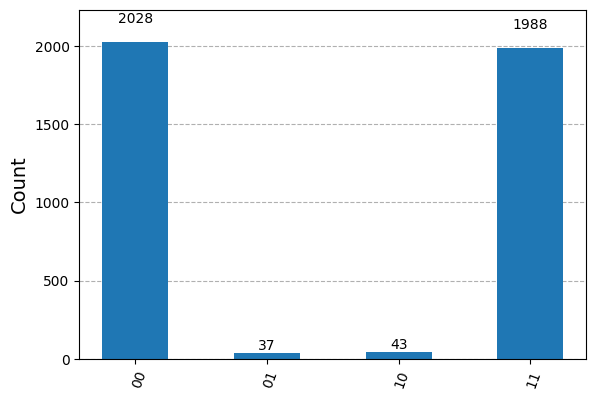

In [163]:
from collections import Counter
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# Count frequency of each bitstring
counts = dict(Counter(bitstrings))
print("Counts:", counts)


hist = plot_histogram(counts)
hist.figure.set_size_inches(6, 4)  # Optional: adjust size
plt.show()
hist.savefig("histogram.png")


### Example of N qubits circuit

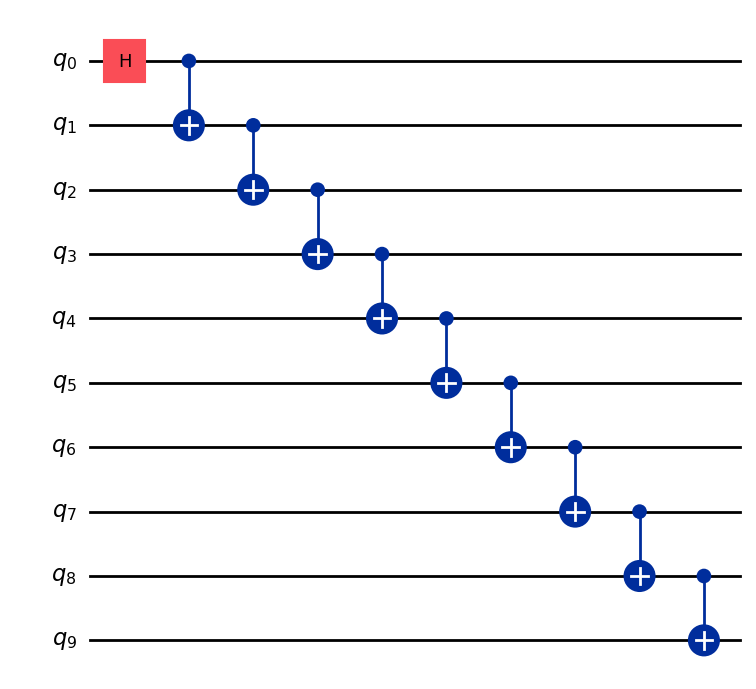

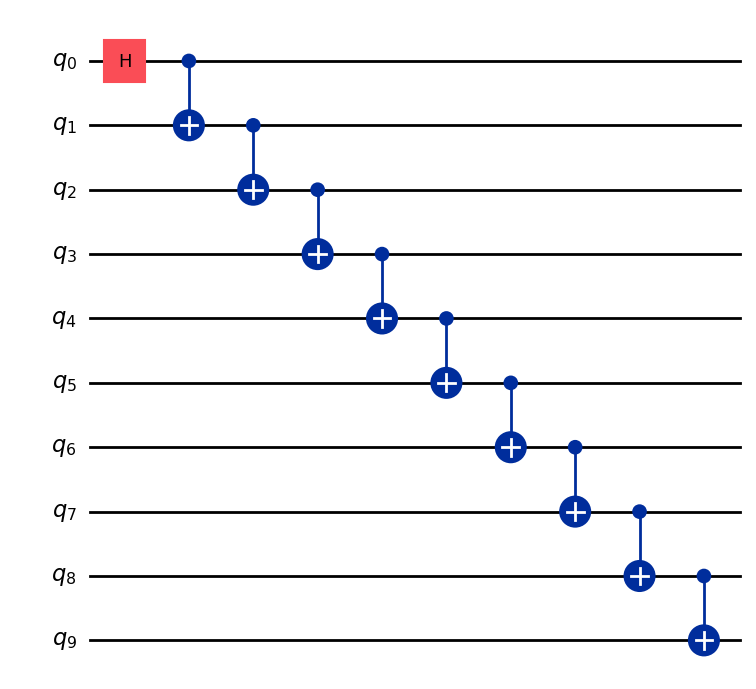

In [ ]:
def get_qc_for_n_qubit(n):
    qc = QuantumCircuit(n)
    qc.h(0)
    for i in range(n-1):
        qc.cx(i, i+1)
    return qc

get_qc_for_n_qubit(10).draw(output='mpl')